# 1.3 The Unique Properties of Qubits

In [54]:
from qiskit import *
from qiskit.visualization import plot_histogram
%config InlineBackend.figure_format = 'svg' # Makes the images look nice

Z measurement:

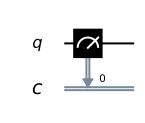

In [55]:
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0)

measure_z.draw(output='mpl')

X measurement (explained later)

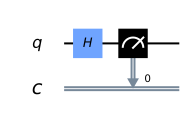

In [56]:
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

measure_x.draw(output='mpl')

Initialize a new bit (0 by default):

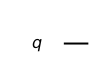

In [57]:
qc_0 = QuantumCircuit(1)

qc_0.draw(output='mpl')

make a z measurement:

Results for z measurement:


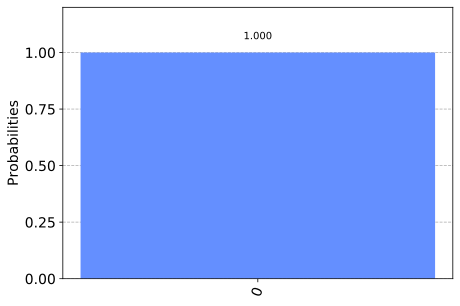

In [58]:
qc = qc_0 + measure_z

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Make a x measurement:

Results for x measurement:


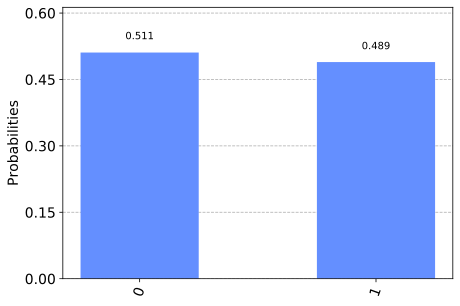

In [59]:
qc = qc_0 +  measure_x

print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Hadamard gates

$$ 
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 && 1 \\
1 && -1 \\
\end{bmatrix}
$$

$$
\left| 0 \right> \rightarrow \frac{\left| 0 \right> + \left| 1 \right> }{\sqrt{2}}
$$

$$
\left| 1 \right> \rightarrow \frac{\left| 0 \right> - \left| 1 \right> }{\sqrt{2}}
$$

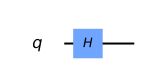

In [60]:
qc_plus = QuantumCircuit(1)
qc_plus.h(0)

qc_plus.draw(output='mpl')

Results for z measurement:


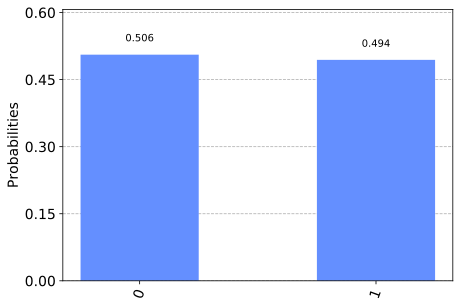

In [61]:
qc = qc_plus + measure_z

qc.draw()

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

Results for x measurement:


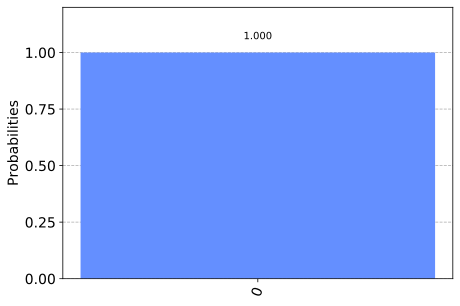

In [62]:
qc = qc_plus + measure_x

print('Results for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## ry gate

y rotation (explain more later)

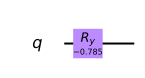

In [63]:
qc_y = QuantumCircuit(1)
qc_y.ry( -3.14159/4,0)

qc_y.draw(output='mpl')

Results for z measurement:


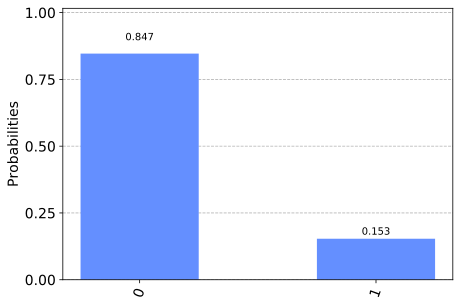

In [64]:
qc = qc_y + measure_z

print('Results for z measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


Results for x measurement:


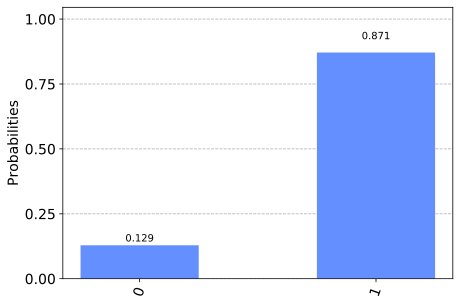

In [65]:
qc = qc_y + measure_x

print('\nResults for x measurement:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

## Hardy’s paradox

This is in fact a variant. The goal is to prove Einstein wrong.

Goal:


- If z measurements are made on both qubits, they never both output 0.
- If an x measurement of one qubit outputs 1, a z measurement of the other will output 0.

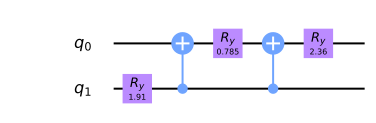

In [66]:
qc_hardy = QuantumCircuit(2)
qc_hardy.ry(1.911,1)
qc_hardy.cx(1,0)
qc_hardy.ry(0.785,0)
qc_hardy.cx(1,0)
qc_hardy.ry(2.356,0)

qc_hardy.draw(output='mpl')

Showing that these qubits satisfy the first property:


Results for two z measurements:


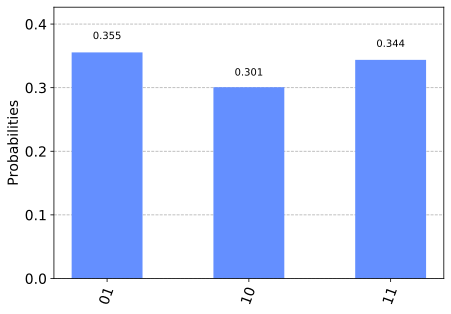

In [67]:
measurements = QuantumCircuit(2,2)
# z measurement on both qubits
measurements.measure(0,0)
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two z measurements:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

In [ ]:
Showing that these qubits satisfy the second property:


Results for two x measurement on qubit 0 and z measurement on qubit 1:


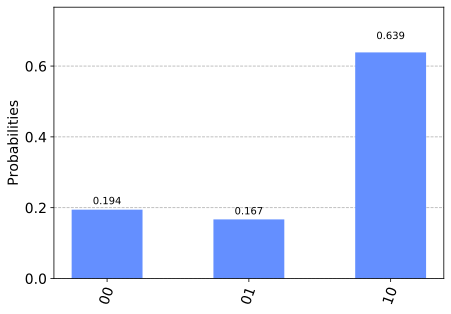

In [68]:
measurements = QuantumCircuit(2,2)
# x measurement on qubit 0
measurements.h(0)
measurements.measure(0,0)
# z measurement on qubit 1
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two x measurement on qubit 0 and z measurement on qubit 1:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)


Results for two x measurement on both qubits:


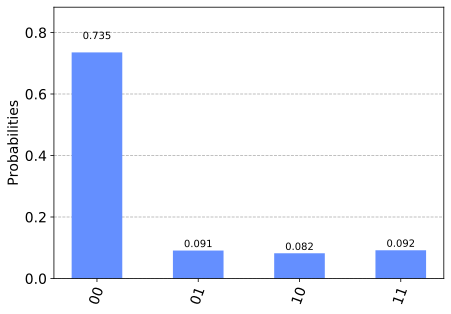

In [69]:
measurements = QuantumCircuit(2,2)
measurements.h(0)
measurements.measure(0,0)
measurements.h(1)
measurements.measure(1,1)

qc = qc_hardy + measurements

print('\nResults for two x measurement on both qubits:')
counts = execute(qc,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts)

### False inference:

> For example, let's think about the case where both qubits output 1 for an x measurement. By applying property 2 we can deduce what the result would have been if we had made z measurements instead: We would have gotten an output of 0 for both. However, this result is impossible according to property 1. We can therefore conclude that an output of 1 for x measurements of both qubits must also be impossible.

But there is a loophole in the sentence:

> By applying property 2 we can deduce what the result would have been if we had made z measurements instead.

This is not possible due to the uncertainty principle.